In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import cv2 as cv

In [2]:
# Path of the dataset
data_path = 'AI-2 Univ AI'
train_dir = os.path.join(data_path,'train_another')
val_dir = os.path.join(data_path,'validation_another')
test1_dir = os.path.join(data_path, 'test_another')
test2_dir = os.path.join(data_path, 'test')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.applications import DenseNet201

In [4]:
# Get your train and test data
train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',shuffle=True)
val_generator=val_datagen.flow_from_directory(val_dir,target_size=(224,224),class_mode='binary',shuffle=True)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


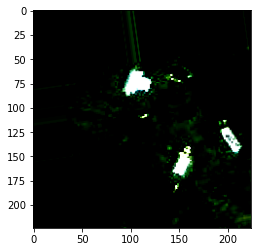

In [5]:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [6]:
base_model=DenseNet201(input_shape=[224,224,3],weights='imagenet',include_top=False) 

In [7]:
x=base_model.output
base_model.trainable=False
x=keras.layers.GlobalAveragePooling2D()(x)
x=keras.layers.Dense(512,activation='relu')(x)
preds=keras.layers.Dense(1,activation='sigmoid')(x) 
model=keras.models.Model(inputs=[base_model.input],outputs=[preds]) #specify the inputs and outputs

In [8]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [34]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_validation=val_generator.n//val_generator.batch_size 

model.fit(train_generator,validation_data=val_generator,steps_per_epoch=step_size_train,validation_steps=step_size_validation,epochs=10)

Epoch 1/10
312/312 [==============================] - 1324s 4s/step - loss: 0.2454 - accuracy: 0.9005 - val_loss: 0.1512 - val_accuracy: 0.9466
Epoch 2/10
312/312 [==============================] - ETA: 0s - loss: 0.1663 - accuracy: 0.9330

KeyboardInterrupt: 

In [35]:
model.evaluate(val_generator,steps=step_size_validation)

62/62 [==============================] - 211s 3s/step - loss: 0.1283 - accuracy: 0.9541


[0.12834085524082184, 0.9541330933570862]

In [10]:
test1_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test1_generator=test1_datagen.flow_from_directory(test1_dir,target_size=(224,224),class_mode='binary',shuffle=True)
step_size_test1=test1_generator.n//test1_generator.batch_size 

Found 9000 images belonging to 2 classes.


In [11]:
model.evaluate(test1_generator)#,steps=step_size_test1)

282/282 [==============================] - 1365s 5s/step - loss: 0.1267 - accuracy: 0.9499


[0.1266758143901825, 0.9498888850212097]

In [39]:
test2_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test2_generator=test2_datagen.flow_from_directory(test2_dir,target_size=(224,224),class_mode='binary',shuffle=True)
step_size_test2=test2_generator.n//test2_generator.batch_size 

Found 2000 images belonging to 2 classes.


In [45]:
model.evaluate(test2_generator,steps=step_size_test2)

62/62 [==============================] - 307s 5s/step - loss: 0.1283 - accuracy: 0.9541


[0.12833863496780396, 0.9541330933570862]

In [46]:
model.save_weights('Project.h5')